# Problema 1

Un equipo de desarrollo está evaluando la eficiencia de un nuevo algoritmo implementado en *Python*. Han medido el tiempo de ejecución del algoritmo en función de la cantidad de elementos de entrada, obteniendo los resultados que se muestran en la siguiente tabla:

<p><center>

| Cantidad de elementos (unidades) | Tiempo de ejecución (ms) |
|----------------------------------|--------------------------|
|$$ 100 $$                         | $$2 $$                   |
|$$ 200 $$                         | $$4 $$                   |
|$$ 500 $$                         | $$10 $$                  |
|$$ 1.000 $$                        | $$20 $$                  |
|$$ 2.000 $$                        | $$40 $$                  |

</center></p>

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. Encuentra la función que relaciona el tamaño de la entrada con el tiempo de ejecución del algoritmo, para esto utiliza la función *polyfit* de *Numpy*.
3. Calcula el tiempo de ejecución para una entrada de $1.500$ elementos.
4. Utiliza la función *fsolve* de *Scipy* para determinar el tamaño de entrada que haría que el tiempo de ejecución sea de $50$ milisegundos.


1. Variabe independiente x: Elementos en unidades

   Variable dependiente T(x): Tiempo en ms 

In [3]:
#2. Definir la forma algebraica de la funcion T(x) = m * x + n
import numpy as np
elementos = np.array([100, 200, 500, 1000, 2000])
tiempo = np.array([2, 4, 10, 20, 40])

pendiente, intercepto = np.polyfit(elementos, tiempo, 1)

print(f"la pendiente es {pendiente:.2f} y el intercepto es {intercepto:.2f}")

la pendiente es 0.02 y el intercepto es 0.00


La expreson algebraica de la funcion es T(x) = 0.02x

In [16]:
#3. tiempo de ejecucion para 1500 elementos T(1500)

def T(x):
    return 0.02 * x 

print(f"El tiempo de ejecucion para 1500 elementos sera de {T(1500)} ms")



El tiempo de ejecucion para 1500 elementos sera de 30.0 ms


In [18]:
#4. Cantidad de elementos en milisegundos T(x)= 50
import numpy as np
from scipy.optimize import fsolve

def T(x):
    return 0.02 * x - 50

x= np.linspace(0, 2500, 1)

solucion= fsolve(T, x)

print(f"En un tiempo de ejecucion de 50 ms la cantidad de elementos serian {solucion[0]:.0f}")

En un tiempo de ejecucion de 50 ms la cantidad de elementos serian 2500


# Problema 2

Un equipo de TI está monitoreando el tráfico de datos en la red de la empresa. Han registrado el volumen de los datos transferidos y el tiempo que tomó cada transferencia en la siguiente tabla de datos:

<p><center>

|Datos transferidos (GB) | Tiempo de transferencia (min)|
|------------------------|------------------------------|
|$$5$$                   |$$10$$                        |
|$$10$$                  |$$20$$                        |
|$$25$$                  |$$50$$                        |
|$$50$$                  |$$100$$                       |
|$$100$$                 |$$200$$                       |

</center></p>

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. Utilizando la función *polyfit* de *Numpy* encuentra la función que modela el tiempo de transferencia $T(x)$ en función del volumen de los datos transferidos.
3. Interprete la pendiente en el contexto del problema.
4. ¿Cuánto tiempo toma una transferencia de $73,2$ GB?
5. Utiliza la función *fsolve* de *Scipy* para determinar la cantidad de datos que se puedan transferir en $123,5$ minutos.
6. Grafica la función $T(x)$ indicando el nombre de los ejes y su unidad de medida. Interpreta lo observado. *Para graficar utiliza la biblioteca Matplotlib.*

1. Variable independiente:Datos transferidos en gb

    Variable dependiente: tiempo de transferencia en minutos
    

2. La funcion que modela el tiempo de transferencia en funcion al volumen de los datos es

    T(x) = 2 * x

In [16]:
#2 funciona que modela el tiempo de transferencia
import numpy as np
datos_transferidos = np.array([5, 10, 25, 50 ,100])
tiempo_transferencia = np.array([10, 20 , 50, 100, 200])

pendiente , intercepto = np.polyfit (datos_transferidos, tiempo_transferencia, 1)

print(f"La pendiente es de: {pendiente:.2f} \nel intercepto es de: {intercepto:.2f}")

def t(x):
    return 2*x 



La pendiente es de: 2.00 
el intercepto es de: 0.00


3. La pendiente de la funcion aumentara en 2 por cada dato transferido 

In [14]:
#4. El tiempo que toma transferir 73.2gb 

import numpy as np

def t(x):
    return 2 * x

x = 73.2 #En gigas

print(f"El tiempo que tarda transferir 73.2 gb es de {t(x):.2f} minutos")

El tiempo que tarda transferir 73.2 gb es de 146.40 minutos


In [11]:
#5. cuantos datos de transfieren en 123,5 minutos
import numpy as np
from scipy.optimize import fsolve

def t(x):
    return 2 * x - 123.5

x= np.linspace(0,200,1)

solucion = fsolve(t, x)

print(f"en 123.5 minutos los datos transferidos serian de {solucion[0]} GB")

en 123.5 minutos los datos transferidos serian de 61.75 GB


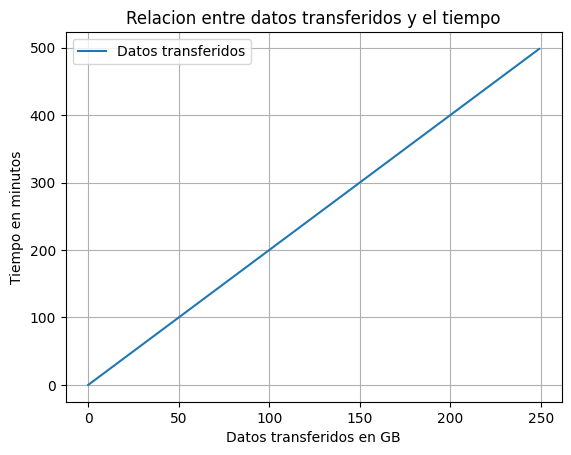

In [15]:
#6. Grafico de la funcion
import numpy as np
import matplotlib.pyplot as plt

def t(x):
    return 2 * x

x= np.arange(0,250,1)

plt.plot(x, t(x), label = "Datos transferidos")

plt.title("Relacion entre datos transferidos y el tiempo")

plt.xlabel("Datos transferidos en GB")

plt.ylabel("Tiempo en minutos")

plt.legend()

plt.grid(True)

plt.show()

# Problema 3


Una empresa de tecnología quiere optimizar el tiempo de carga y descarga de archivos en su servicio de almacenamiento en la nube. Los tiempos medios para diferentes tamaños de archivos son los siguientes:

<p><center>

| Tamaño del archivo (MB) | Tiempo de carga (s) | Tiempo de descarga (s)|
|-------------------------|---------------------|-----------------------|
|$$50$$                   |$$10$$               |$$8$$                  |
|$$100$$                  |$$20$$               |$$16$$                 |
|$$250$$                  |$$50$$               |$$40$$                 |
|$$500$$                  |$$100$$              |$$80$$                 |
|$$1.000$$                 |$$200$$              |$$160$$                |

</center></p>

1. Encuentra las funciones que modelan el tiempo de carga $f(x)$ y el tiempo de descarga $g(x)$ en función del tamaño del archivo $x$. Utiliza la función *polyfit* de *Numpy* (debes encontrar dos funciones).
2. Define variable dependiente e independiente, para ambas funciones, indicando su unidad de medida.
3. Calcula el tiempo de carga y descarga para un archivo de $750$ MB.
4. Utiliza la función *fsolve* de *Scipy* para determinar el tamaño del archivo si el tiempo de carga es de $163$ segundos.
5. Un trabajador insiste en que si el tiempo de descarga es de $195$ segundos, el tamaño del archivo es $1.200$ MB. ¿Tiene razón? Utiliza *Python* para determinar.
6. Grafica ambas funciones en el mismo gráfico, indicando nombre de los ejes y unidades de medida. Utiliza la librería *Matplotlib* para graficar.

In [1]:
#1 Variable independiente x= tamaño del archivo en mb 
#  Variable dependiente F(x)= tiempo de carga en segundos
#  Variable dependiente G(x)= tiempo de descargar en segundos

import numpy as np

tamaño = np.array([50, 100, 250, 500, 1000])
tiempo_carga= np.array([10, 20, 50, 100, 200])
tiempo_descarga= np.array([8, 16, 40, 80, 160])

pendiente_carga, intercepto_carga = np.polyfit(tamaño, tiempo_carga, 1)
pendiente_descar, intercepto_descar = np.polyfit(tamaño, tiempo_descarga, 1)

print(f"para la carga la pendiente es de {pendiente_carga:.2f} y el intercepto {intercepto_carga:.2f}")
print(f"para la descargar la pendiente es de {pendiente_descar:.2f} y el intercepto {intercepto_descar:.2f}")

def F(x):
    return 0.20 * x

def G(x):
    return 0.16 * x

para la carga la pendiente es de 0.20 y el intercepto 0.00
para la descargar la pendiente es de 0.16 y el intercepto 0.00


La forma algebraica para la funcion de la carga es F(x)= 0.2x y para la descarga G(x)= 0.16x

In [20]:
#3 Se pide F(750) y G(750)
def F(x):
    return 0.20 * x

def G(x):
    return 0.16 * x

print(f"Para 750 mb el tiempo de descarga sera de {G(750):.2f} segundos")
print(f"Para 750 mb el tiempo de carga sera de {F(750):.2f} segundos")

Para 750 mb el tiempo de descarga sera de 120.00 segundos
Para 750 mb el tiempo de carga sera de 163.00 segundos


In [19]:
#4.Determinar el tamaño del archivo si el tiempo de carga es de 163 segundos
import numpy as np
from scipy.optimize import fsolve
def F(x):
    return 0.20 * x - 163

x = np.linspace(0,200, 1)

solucion = fsolve(F, x)

print(f"El tamaño del archivo si el tiempo de carga es de 163 segundos es de {solucion[0]:.2f} Mb")

El tamaño del archivo si el tiempo de carga es de 163 segundos es de 815.00 Mb


In [21]:
#5. Si el tiempo de descarga es de 195 segundos el temaño del archivo es de 1200 mb ?
def G(x):
    return 0.16 * x

print(f"si el archivo es de 1200mb el tiempo de descarga sera de {G(1200)} segundos")




si el archivo es de 1200mb el tiempo de descarga sera de 192.0


el tiempo de descarga para 1200 mb son 192 segundos y no de 195

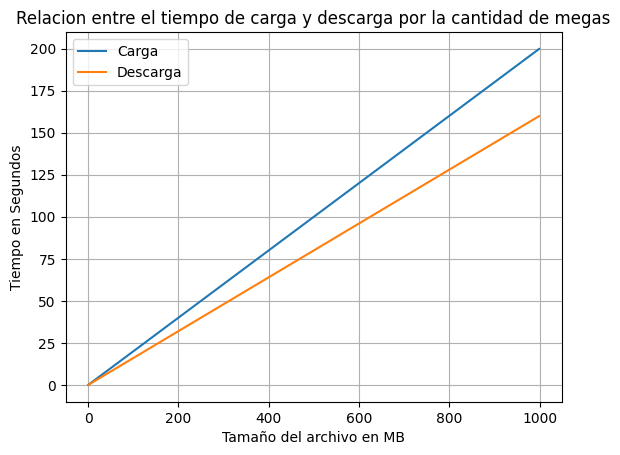

In [23]:
#6  Grafico de la ambas funciones

import numpy as np
import matplotlib.pyplot as plt
def F(x):          #Carga
    return 0.20 * x

def G(x):          #descarga
    return 0.16 * x

c = np.arange(0,1000,1)

d = np.arange(0,1000, 1)

plt.plot(c, F(c), label = "Carga")
plt.plot(d, G(d), label = "Descarga")

plt.title("Relacion entre el tiempo de carga y descarga por la cantidad de megas")

plt.xlabel("Tamaño del archivo en MB")
plt.ylabel("Tiempo en Segundos")

plt.legend()
plt.grid(True)
plt.show()


# Problema 4

El uso de memoria $M(x)$ (en GB) de un servidor en función del número de usuarios activos $x$ está dado por la función lineal:

 $$M(x) = 0.5x + 2$$

1. Determina la variable dependiente e independiente, indicando unidad de medida.
2. Identifica e interpreta la pendiente de la función.
3. ¿Cuánta memoria del servidor está en uso cuando no hay usuarios activos?
4. ¿Cuánta memoria del servidor está en uso cuando hay $637$ usuarios activos?
5. Utiliza *Python* para determinar cuántos usuarios activos provocan un uso de memoria de $32$ GB.
6. ¿Es posible un uso de memoria de $59,8$ GB?

1. Variable independiente (X) : Usuarios activos en unidad

   Variable dependiente M(x): uso de memoria en GB 

2. Por cada usuario el uso de memoria aumenta en 0.5

3. Cuanta memoria del servidor esta en uso cuando 0 usuarios activos


In [25]:
def M(x):
    return 0.5 * x + 2

print(f"Cuando no hay usuarios activos el uso de memoria del servidor es de {M(0)} GB")

Cuando no hay usuarios activos el uso de memoria del servidor es de 2.0 GB


4. Cuanto memoria del servidor esta en uso cuando hay 637 usuarios activos


In [33]:
def M(x):
    return 0.5 * x + 2

print(f"Cuando hay 637 usuarios activos el uso de memoria del servidor es de {M(637)} GB")

Cuando hay 637 usuarios activos el uso de memoria del servidor es de 32.0 GB


5. Cuantos usuarios hay activos cuando el uso de memoria en el servidor es de 32 GB

In [32]:
import numpy as np
from scipy.optimize import fsolve
def M(x):
    return 0.5 * x + 2 - 32

x = np.linspace(0,50, 1)

solucion = fsolve(M, x)

print(f"Cuando el uso de memoria es de 32gb la cantidad de usuarios activos es de {solucion[0]}")

Cuando el uso de memoria es de 32gb la cantidad de usuarios activos es de 60.0


6. Es posible un uso de memoria 59.2 GB

In [34]:
import numpy as np
from scipy.optimize import fsolve
def M(x):
    return 0.5 * x + 2 - 59.2

x = np.linspace(0,50, 1)

solucion = fsolve(M, x)

print(f"Cuando el uso de memoria es de 59.2gb la cantidad de usuarios activos es de {solucion[0]}")


Cuando el uso de memoria es de 32gb la cantidad de usuarios activos es de 114.4


No puede haber un uso de memoria de 59.2 Gb ya que para esto se necesitaria una parte de un usuario lo cual no es posible

# Problema 5

El costo de operación mensual $C(x)$ (en miles de dólares) de un data center en función del número de servidores $x$ está dado por la función lineal:

 $$C(x) = 1,5x + 10$$

1. Determine la variable dependiente e independiente, indicando unidad de medida.
2. ¿Qué representa la pendiente en el contexto del problema?
3. ¿Qué representa el intercepto en el contexto del problema?
4. Calcula el costo de operación cuando hay $47$ servidores.
5. Determina cuántos servidores hay cuando el costo de operación es de $92.500$ dólares. Utiliza *Python* para resolver.


# Problema 6

El número de visitas diarias $V(x)$ en un sitio web, en función del número de campañas publicitarias $x$, está modelado por la función:

$$V(x) = 300x + 500$$

Los administradores del sitio consideran contratar $20$ campañas publicitarias como máximo.

1. Defina variable dependiente e independiente del problema, indicando unidad de medida.
2. Determine el dominio contextualizado de la función.
3. Interprete la pendiente de la función en el contexto del problema.
4. Determine la cantidad de visitas diarias cuando se ejecutan $5$ campañas publicitarias.
5. Utilizando la función *fsolve* de *Scipy* responde: ¿cuántas campañas publicitarias se deben ejecutar para alcanzar $4.700$ visitas diarias?

# Problema 7

La depreciación es el proceso en que los activos físicos, como la maquinaria, vehículos, equipos, etc., pierden valor con el tiempo debido a factores como el desgaste, el uso y la obsolescencia. El valor estimado que tendrá el activo al final de su vida útil se conoce como *valor residual*.

En este contexto, sabemos que el valor residual $R(t)$ (en miles de dólares) de un equipo tecnológico está modelado por la función lineal:

$$R(t) = -1,2t + 10$$

donde $t$ corresponde a la antigüedad del equipo (en años).

1. Defina variable dependiente e independiente, indicando unidad de medida.
2. ¿Qué representa la pendiente de la función en el contexto del problema?
3. ¿Cuál es el valor residual inicial del equipo?
4. Determine el dominio contextualizado de la función, si sabe que el valor del equipo al final de su vida útil es de $400$ dólares.
5. Determina, utilizando la función *def* de *Python*, el valor residual del equipo con $3$ años y seis meses de antigüedad.
6. Determina, utilizando la función *fsolve*  de *Scipy*, la antigüedad del equipo cuando su valor residual es de $4.000$ dólares.
7. Grafica la función utilizando la biblioteca *Matplotlib*. Interpreta lo observado.

# Problema 8

El tiempo de ejecución $T(x)$ (en milisegundos) de un algoritmo depende de la cantidad de elementos de entrada (en unidades) mediante una función lineal cuya gráfica se muestra en la siguiente imagen:

<br>

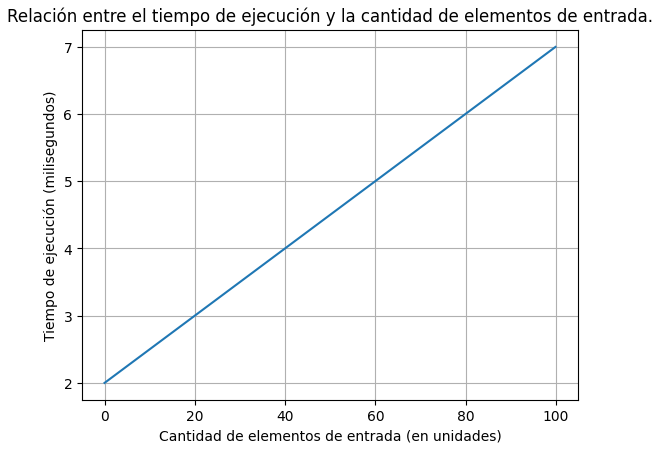

<br>

1. Determina la forma algebraica de la función que mejor se ajusta al gráfico. Utiliza la función polyfit de Scipy para calcular.
2. Determina el tiempo de ejecución del algoritmo para $67$ elementos de entrada.
3. ¿Cuántos elementos de entrada se utilizaron si el tiempo de ejecución fue de $6,4$ milisegundos?

# Problema 9

El consumo de energía de un servidor $E(t)$  en función del tiempo $t$ después de implementar una optimización, está modelado por la función lineal que se observa en el siguiente gráfico:

<br>

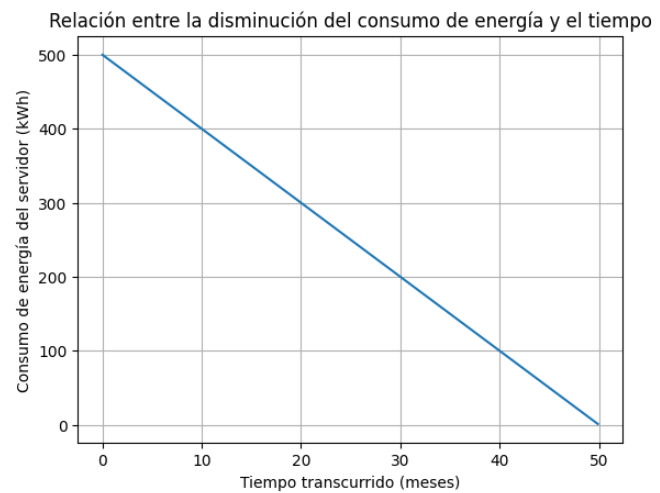

<br>

1. Utiliza la función *polyfit* de *Numpy* para determinar la forma algebraica que mejor se ajusta al gráfico.
2. Interprete la pendiente en el contexto del problema.
3. Determine el consumo de energía luego de un año desde que se implementó la optimización.
4. Encuentre el tiempo transcurrido desde la implementación de la optimización para que la energía consumida sea de $200$ kWh.

# Problema 10

Dos atletas profesionales corren por un camino recto. Durante los primeros $10$ segundos del trayecto, la distancia recorrida (en metros) por el atleta $1$ está dada por la función:

$$g(t) = 0,7t^{2}$$

mientras que la distancia recorrida por el atleta $2$ está dada por la función:

$$f(t) = 10t $$

donde $t$ corresponde al tiempo transcurrido (en segundos) desde el inicio del trayecto.

<br>

1. ¿Cuál de los dos atletas siempre mantuvo una velocidad constante? Justifique. *Recomendación: grafica las funciones utilizando Matlplotlib.*
2. Si la meta se encontraba a $100$ metros de la partida ¿cuál atleta llega primero?
3. ¿A qué distancia se encontraban uno del otro cuando transcurren $8$ segundos? ¿Y cuando transcurren $10$ segundos?
4. Entre el segundo $8$ y el $10$, ¿cuál atleta iba más rápido? Justifique apropiadamente.

# Problema 11

Un *Data Center* ha cotizado el costo de desarrollar un proyecto con dos empresas. El costo (en millones de pesos) entregado por la empresa $1$ está modelado por la función:

$$C_{1}(t) = 12t + 50$$

y costo (en millones de pesos) entregado por la empresa $2$ está modelado por la función:

$$C_{2}(t) = 8t + 100$$

donde $t$ corresponde al tiempo que demoren en realizar el proyecto (en semanas).

<br>

1. Utilizando la biblioteca *Matplotlib* grafique ambas funciones, indicando el nombre de los ejes coordenados junto con su unidad de medida.
2. Si con la empresa $1$ pagaron $155$ millones de pesos ¿cuántas semanas duró el trabajo?
3. Analizando el gráfico de la pregunta $1$, determine: ¿cuándo conviene desarrollar el proyecto con la empresa $1$? ¿Y la empresa $2$?